# About Dataset
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-payout/expenses.csv


In [59]:
df = pd.read_csv('/kaggle/input/medical-insurance-payout/expenses.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1 - EDA

In [60]:
# imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Dataset information | Counting Null Values | Datatype Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
# Get categorical and numerics features
feat_cat = df.select_dtypes(include = object).columns
feat_num = df.select_dtypes(exclude = object).columns
feat_cat, feat_num

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

In [63]:
# Unique values
unique_values = dict()
for f in feat_cat:
    print(f)
    print(df[f].value_counts().head())
    print('-'*10)
    
    unique_values[f] = list( df[f].unique() )
unique_values

sex
male      676
female    662
Name: sex, dtype: int64
----------
smoker
no     1064
yes     274
Name: smoker, dtype: int64
----------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
----------


{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

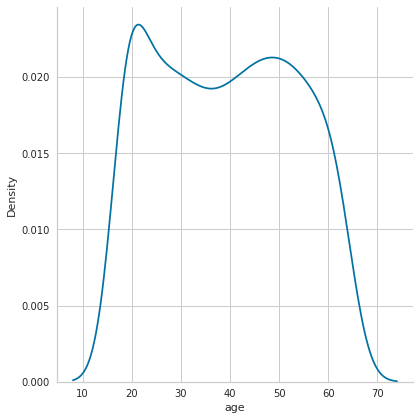

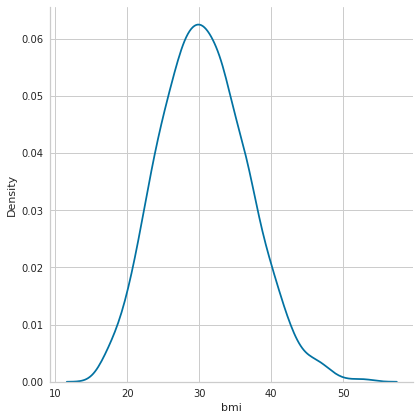

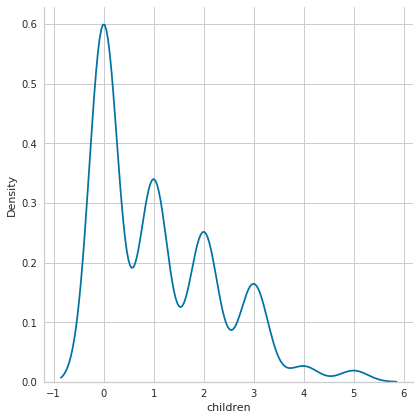

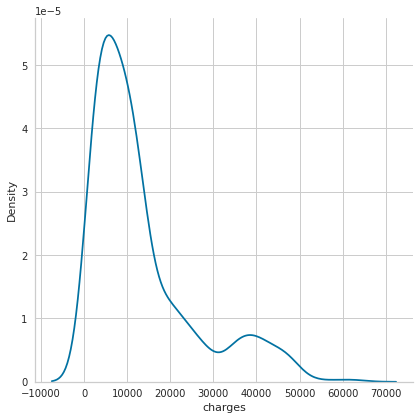

In [64]:
# Data distribution
## Only BMI has a normal distribution
for f in feat_num:
  sns.displot(data = df, x = f, kind = 'kde', height = 6);

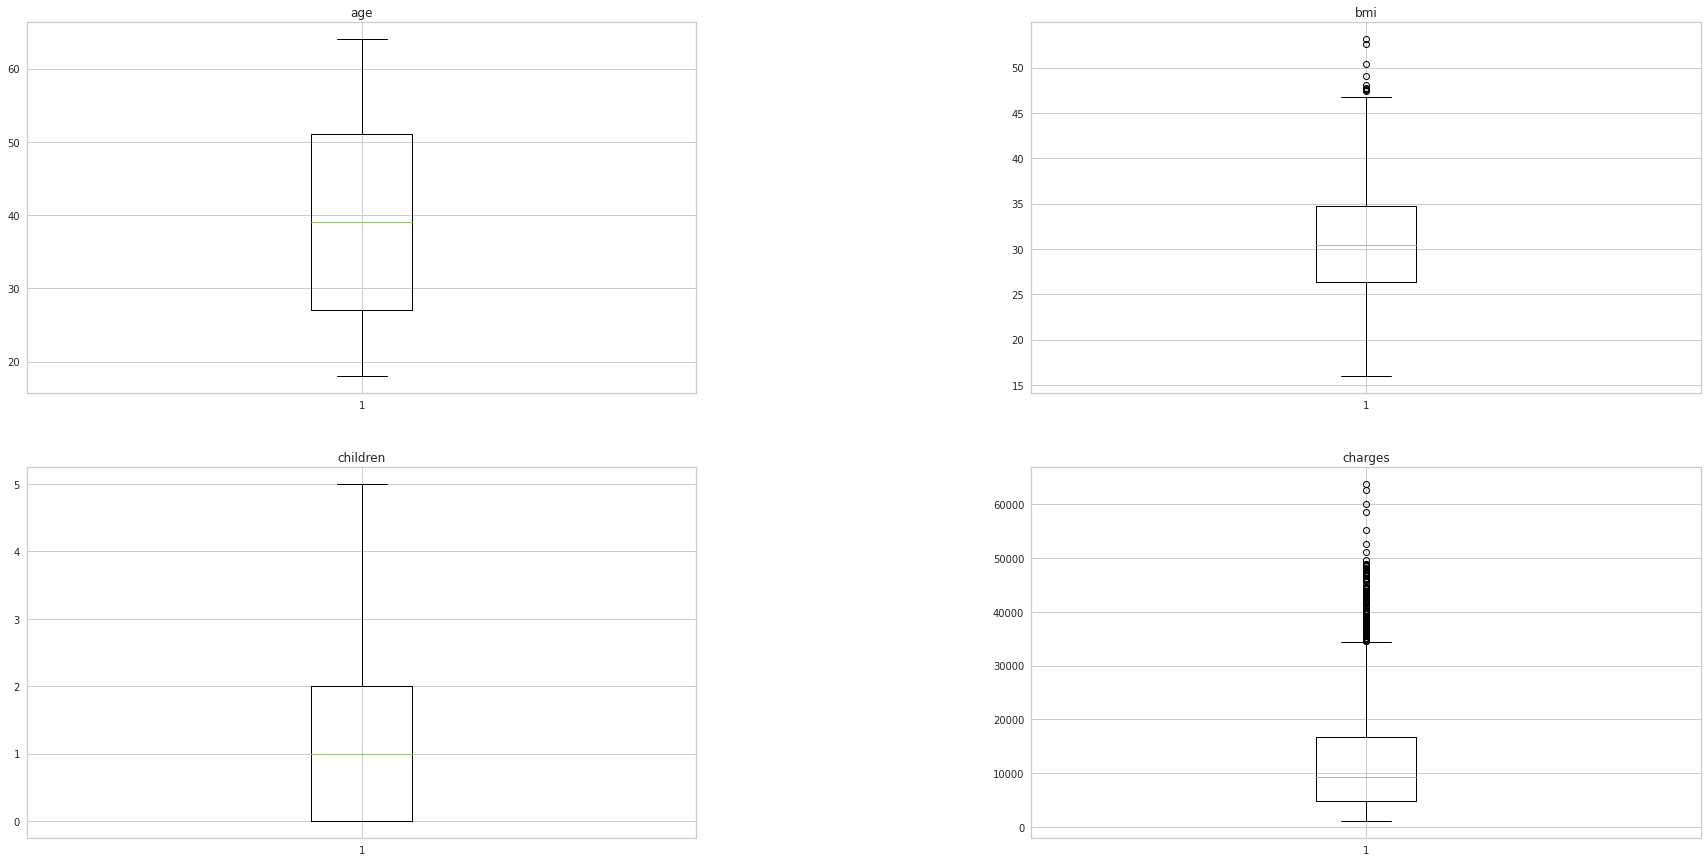

In [65]:
# Outliers
rows, columns = 2, 2
fig, axes = plt.subplots(rows, columns, figsize=(30, 15))
axes = axes.ravel()
for i in range(rows*columns):
    column = feat_num[i]
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
plt.subplots_adjust(wspace = 0.5)

In [66]:
# Data Multicollinearity
## age and BMI are somewhat redundant | age e BMI são um pouco redundantes
features = feat_num[:-1] # Exclude target

vif = pd.DataFrame()
vif['feature'] = features
vif["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
vif

,feature,VIF
0,age,7.536550
1,bmi,7.846515
2,children,1.796637


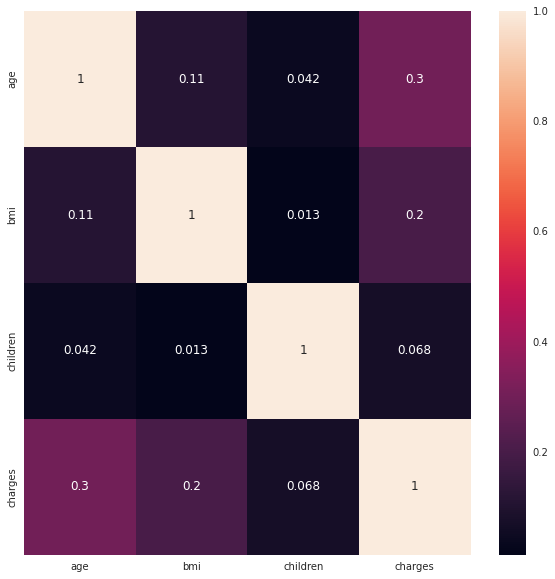

In [67]:
# Data Correlation
# BMI and AGE have a weak correlation, but are multicollinear | BMI e AGE possuem correlação fraca, mas são multicolineares
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True);

In [68]:
sns.set_palette('Set2')

In [69]:
bmi_status = list()
for bmi in df['bmi'].values:
    bmi_status.append( 'underweight' if bmi < 18.5 else 'normal weight' if bmi < 25 else 'overweight' if bmi < 30 else 'obesity' )
df['bmi_status'] = bmi_status
df.head(3)

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.90,0,yes,southwest,16884.9240,overweight
1,18,male,33.77,1,no,southeast,1725.5523,obesity
2,28,male,33.00,3,no,southeast,4449.4620,obesity


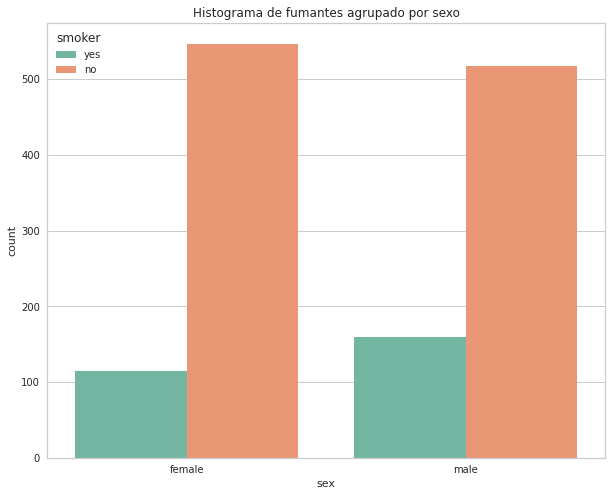

In [70]:
plt.figure(figsize = (10, 8))
plt.title('Histograma de fumantes agrupado por sexo')
ax = sns.countplot(x="sex", hue="smoker", data=df);

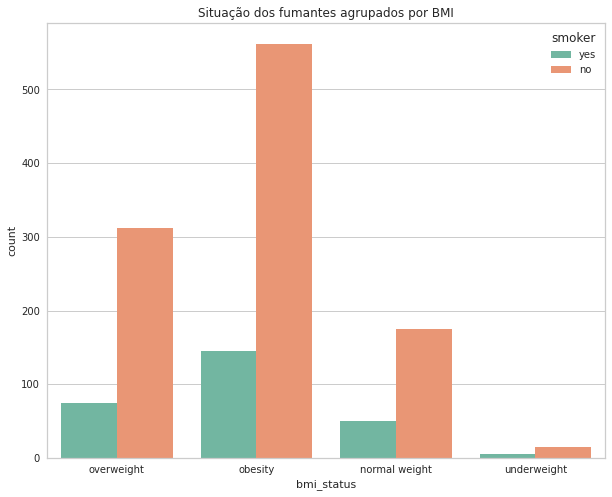

In [71]:
plt.figure(figsize = (10, 8))
plt.title('Situação dos fumantes agrupados por BMI')
ax = sns.countplot(x="bmi_status", hue="smoker", data=df);

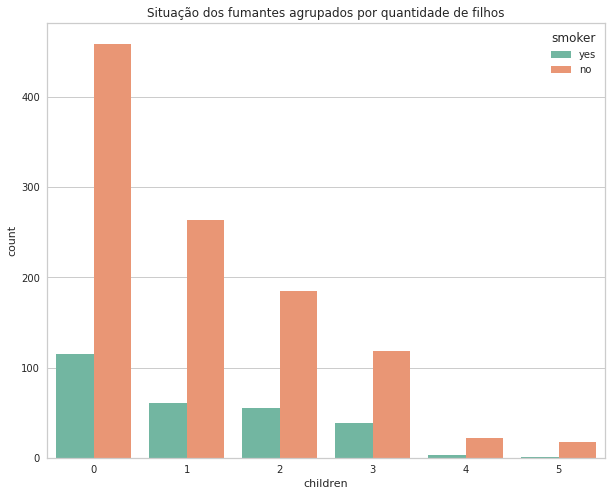

In [72]:
plt.figure(figsize = (10, 8))
plt.title('Situação dos fumantes agrupados por quantidade de filhos')
ax = sns.countplot(x="children", hue="smoker", data=df);

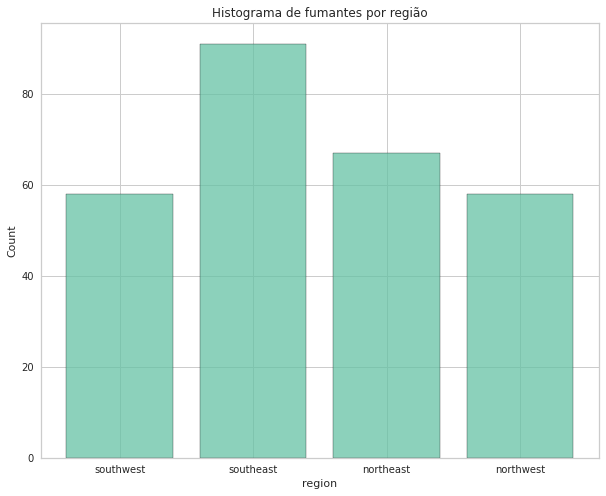

In [73]:
plt.figure(figsize = (10, 8))
plt.title('Histograma de fumantes por região')
sns.histplot(data=df[df['smoker'] == 'yes'], x="region", multiple="dodge", shrink=.8);

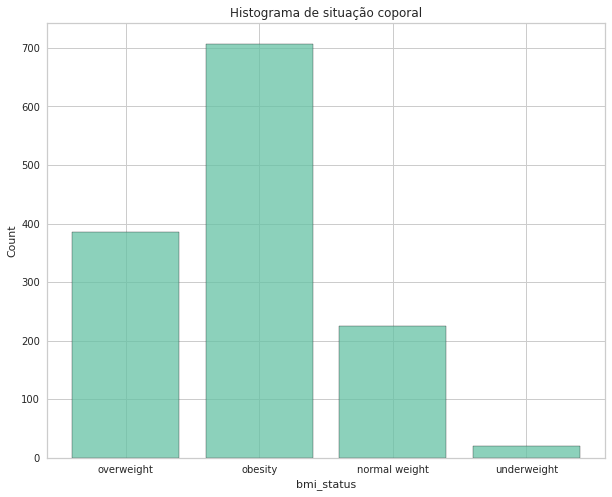

In [74]:
plt.figure(figsize = (10, 8))
plt.title('Histograma de situação coporal')
sns.histplot(data=df, x="bmi_status", multiple="dodge", shrink=.8); # hue="sex",

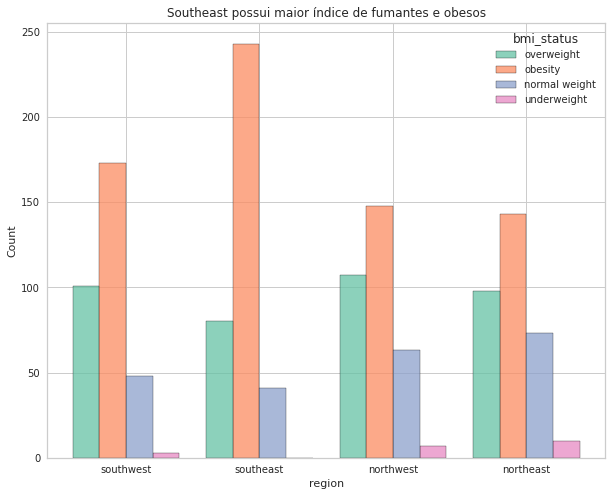

In [75]:
plt.figure(figsize = (10, 8))
plt.title('Southeast possui maior índice de fumantes e obesos')
sns.histplot(data=df, x="region", hue="bmi_status", multiple="dodge", shrink=.8);

Text(0.5, 1.0, 'smoker')

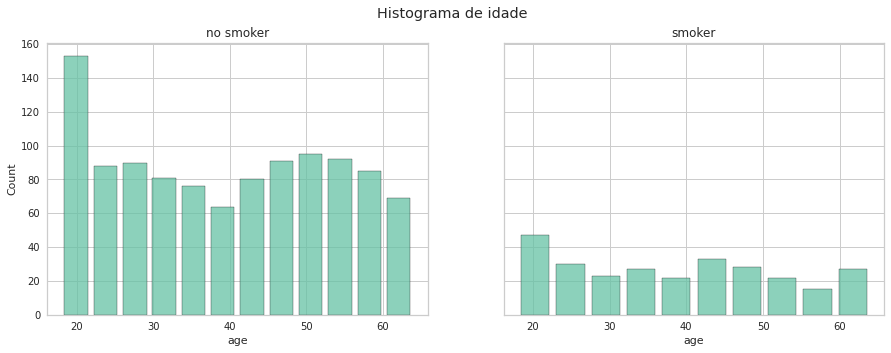

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Histograma de idade')

# no smoker
sns.histplot(data=df[df['smoker'] == 'no'], x="age", multiple="dodge", shrink=.8, ax=axes[0]);
axes[0].set_title('no smoker');
# smoker
sns.histplot(data=df[df['smoker'] == 'yes'], x="age", multiple="dodge", shrink=.8, ax=axes[1]);
axes[1].set_title('smoker')

# 2 - Data Preparation

In [77]:
# imports
from category_encoders import LeaveOneOutEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose  import ColumnTransformer

In [78]:
X, y = df.drop(['charges', 'bmi_status'], axis = 1), df['charges']
X.shape, y.shape

((1338, 6), (1338,))

In [79]:
feat_cat = list( X.select_dtypes(include = object).columns )
feat_num = list( X.select_dtypes(exclude = object).columns )

In [80]:
## The processes used in the generation of "trees" do not involve the use of distances, therefore, it is not necessary to normalize the numerical data.
## Os processos utilizados para geração de "árvores" não envolvem o uso de distâncias, com isso, não é preciso normalizar os dados numéricos.

numeric_transformer  = Pipeline(steps = [('imputer', SimpleImputer())])
numeric_transformer2 = Pipeline(steps = [('minmax', MinMaxScaler())])
categorical_transformer = Pipeline(steps = [('loo', LeaveOneOutEncoder())])

preprocessor = ColumnTransformer(transformers = [
      ('num', numeric_transformer, feat_num), 
      ('cat', categorical_transformer, feat_cat)]
                                )

preprocessor2 = ColumnTransformer(transformers = [
      ('num', numeric_transformer2, feat_num), 
      ('cat', categorical_transformer, feat_cat)]
                                )

In [81]:
def get_metrics(y_test, y_pred):
    MAE  = mean_absolute_error(y_test, y_pred)
    MSE  = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2   = r2_score(y_test, y_pred)
    
    return MAE, MSE, RMSE, R2

In [82]:
def get_df_pred(y_test, y_pred):
    data = []
    for t, p in zip(y_test.array, y_pred):
      data.append( (int(t), int(p)) )

    return pd.DataFrame(data, columns = ('Test', 'Pred'))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 6), (402, 6), (936,), (402,))

In [84]:
# imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, make_scorer

# 3 - Algorithms based on decision trees

In [74]:
# imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## 3.1 - Tuning hiper-parameters

In [75]:
clf_tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeRegressor())]
)

clf_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor())]
)

clf_xgbr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBRegressor())]
)

In [26]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 14)

### 3.1.1 Decision Tree

In [28]:
params_tree = {'classifier__criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
              'classifier__splitter': ('best', ),
              'classifier__min_samples_split': (2, 3, 5, 8, 13),
              'classifier__min_samples_leaf': (1, 2, 3, 5, 8),
              'classifier__max_features': ('auto', 'sqrt', 'log2')}

In [ ]:
grid_search_tree = GridSearchCV(clf_tree, scoring = 'r2', param_grid = params_tree, n_jobs =-1, cv = cv, refit = False)
grid_search_tree.fit(X, y)

In [30]:
results_tree = grid_search_tree.cv_results_
results_tree = pd.DataFrame(data = results_tree, columns = results_tree.keys())
results_tree[results_tree['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__splitter,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
225,0.494809,0.005378,0.01847,0.000878,poisson,auto,1,2,best,"{'classifier__criterion': 'poisson', 'classifi...",...,0.673766,0.574374,0.608455,0.683175,0.539585,0.669172,0.59055,0.619382,0.057344,1


### 3.1.2 Random Forest

In [33]:
params_forest = {'classifier__n_estimators': (21, 34, 55, 89, 100, 144),
                'classifier__criterion': ('squared_error', 'absolute_error', 'poisson'),
                'classifier__min_samples_split': (2, 3, 5, 8),
                'classifier__min_samples_leaf': (1, 2, 3, 5),
                'classifier__max_features': ('sqrt', 'log2'),
                'classifier__oob_score': (True,False)
                }

In [ ]:
grid_search_forest = GridSearchCV(clf_forest, scoring = 'r2', param_grid = params_forest, n_jobs =-1, cv = cv, refit = False)
grid_search_forest.fit(X, y)

In [37]:
results_forest = grid_search_forest.cv_results_
results_forest = pd.DataFrame(data = results_forest, columns = results_forest.keys())
results_forest[results_forest['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__oob_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
377,0.248158,0.004145,0.029689,0.000989,squared_error,log2,5,8,55,False,...,0.726217,0.649411,0.709565,0.748,0.677954,0.782848,0.645138,0.70061,0.06342,1


### 3.1.3 XGBooster

In [27]:
params_xgbr = {'classifier__booster': ('gbtree', ),
               'classifier__sampling_method': ('uniform', 'subsample', 'gradient_based'),
              'classifier__max_depth': (2, 5, 8, 13),
              'classifier__learning_rate': (.1, .3, .5, .8),              
              'classifier__min_child_weight': (1,3,5),
              'classifier__max_delta_step': (0,1,3),
              'classifier__subsample': (.5, 1)}

In [ ]:
grid_search_xgbr = GridSearchCV(clf_xgbr, scoring = 'r2', param_grid = params_xgbr, n_jobs =-1, cv = cv, refit = False, verbose = 1)
grid_search_xgbr.fit(X, y)

In [29]:
results_xgbr = grid_search_xgbr.cv_results_
results_xgbr = pd.DataFrame(data = results_xgbr, columns = results_xgbr.keys())
results_xgbr[results_xgbr['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__booster,param_classifier__learning_rate,param_classifier__max_delta_step,param_classifier__max_depth,param_classifier__min_child_weight,param_classifier__sampling_method,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
654,0.639139,0.004473,0.023998,0.000542,gbtree,0.8,0,2,3,uniform,...,0.636515,0.533466,0.568282,0.733631,0.792461,0.705704,0.704657,0.67479,0.115865,1


## 3.2 Algorithm evaluation
Using the best rated model **(Random Forest)**

In [76]:
clf_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor(criterion = 'squared_error',
                                                                                max_features = 'log2',
                                                                                min_samples_leaf = 5,
                                                                                min_samples_split = 8,
                                                                                n_estimators = 55,
                                                                                oob_score = False)
                                           )]
)

In [77]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)
score = cross_val_score(clf_forest, X, y, cv=cv, scoring = 'r2', n_jobs = -1)

In [78]:
print(f'Median R2: {round(score.mean(), 2)} | STD: {round(score.std(), 2)}')

Median R2: 0.68 | STD: 0.05


In [80]:
model_forest = clf_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

In [81]:
MAE, MSE, RMSE, R2 = get_metrics(y_test, y_pred)

In [82]:
print(f'On average, the Random Forest algorithm misses the insurance payment by ${round(MAE, 2)}')
print(f'MSE: {round(MSE, 2)} | RMSE: {round(RMSE, 2)} | R2: {round(R2, 2)}')

On average, the Random Forest algorithm misses the insurance payment by $4880.31
MSE: 38313699.22 | RMSE: 6189.81 | R2: 0.72


In [83]:
df_pred = get_df_pred(y_test, y_pred)
df_pred.head()

,Test,Pred
0,2250,7584
1,30942,30724
2,10923,10282
3,1964,8708
4,3171,10696


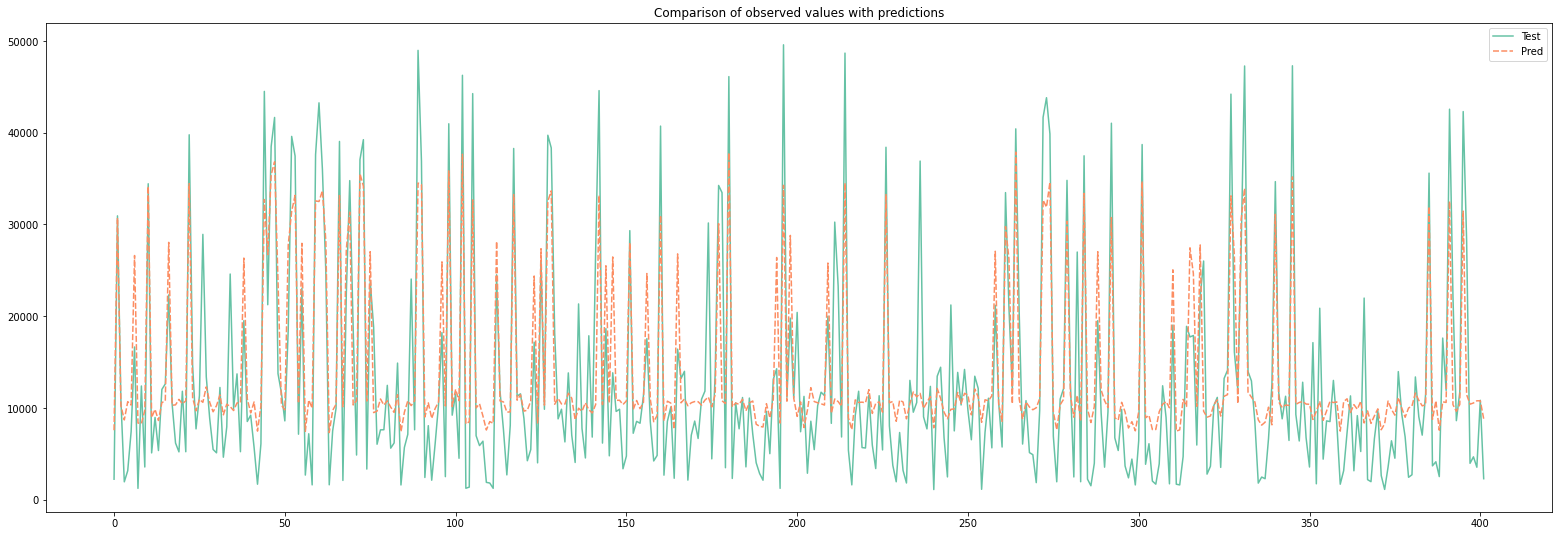

In [84]:
plt.figure(figsize = (27, 9))
plt.title('Comparison of observed values with predictions')
sns.lineplot(data=df_pred);

# 4 - Algorithms based on linear models

In [85]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [104]:
clf_l2 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("classifier", Ridge())]
)

clf_l1 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("classifier", Lasso())]
)

clf_lin = Pipeline(
    steps=[("preprocessor", preprocessor2), ("classifier", LinearRegression())]
)

clf_poly = Pipeline(
    steps=[("preprocessor", preprocessor2), ('polynomial', PolynomialFeatures(degree = 2)), ("classifier", LinearRegression())]
)

## 4.1 - Ridge Regression

In [87]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)
score_l2 = cross_val_score(clf_l2, X, y, cv=cv, scoring = 'r2', n_jobs = -1)

In [88]:
print(f'Median R2: {round(score_l2.mean(), 2)} | STD: {round(score_l2.std(), 2)} | VAR: {round(score_l2.var(), 5)}')

Median R2: 0.74 | STD: 0.05 | VAR: 0.00226


## 4.2 - Lasso Regression

In [89]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)
score_l1 = cross_val_score(clf_l1, X, y, cv=cv, scoring = 'r2', n_jobs = -1)

In [90]:
print(f'Median R2: {round(score_l1.mean(), 2)} | STD: {round(score_l1.std(), 2)} | VAR: {round(score_l1.var(), 5)}')

Median R2: 0.74 | STD: 0.05 | VAR: 0.00227


## 4.3 - Logistic Regression

In [91]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)
score_lin = cross_val_score(clf_lin, X, y, cv=cv, scoring = 'r2', n_jobs = -1)

In [92]:
print(f'Median R2: {round(score_lin.mean(), 2)} | STD: {round(score_lin.std(), 2)} | VAR: {round(score_lin.var(), 5)}')

Median R2: 0.74 | STD: 0.05 | VAR: 0.00227


## 4.4 Polynomial Regression

In [105]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)
score_poly = cross_val_score(clf_poly, X, y, cv=cv, scoring = 'r2', n_jobs = -1)

In [106]:
print(f'Median R2: {round(score_poly.mean(), 2)} | STD: {round(score_poly.std(), 2)} | VAR: {round(score_poly.var(), 5)}')

Median R2: 0.82 | STD: 0.05 | VAR: 0.00212


## 4.4 Algorithm evaluation
Using the best rated model **(Polynomial Regression)**

In [107]:
model_poly = clf_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)

In [108]:
MAE, MSE, RMSE, R2 = get_metrics(y_test, y_pred)

In [109]:
print(f'On average, the Ridge Regression algorithm misses the insurance payment by ${round(MAE, 2)}')
print(f'MSE: {round(MSE, 2)} | RMSE: {round(RMSE, 2)} | R2: {round(R2, 2)}')

On average, the Ridge Regression algorithm misses the insurance payment by $3132.41
MSE: 23925019.53 | RMSE: 4891.32 | R2: 0.83


In [110]:
df_pred = get_df_pred(y_test, y_pred)
df_pred.head()

,Test,Pred
0,2250,3605
1,30942,37190
2,10923,12142
3,1964,3581
4,3171,3243


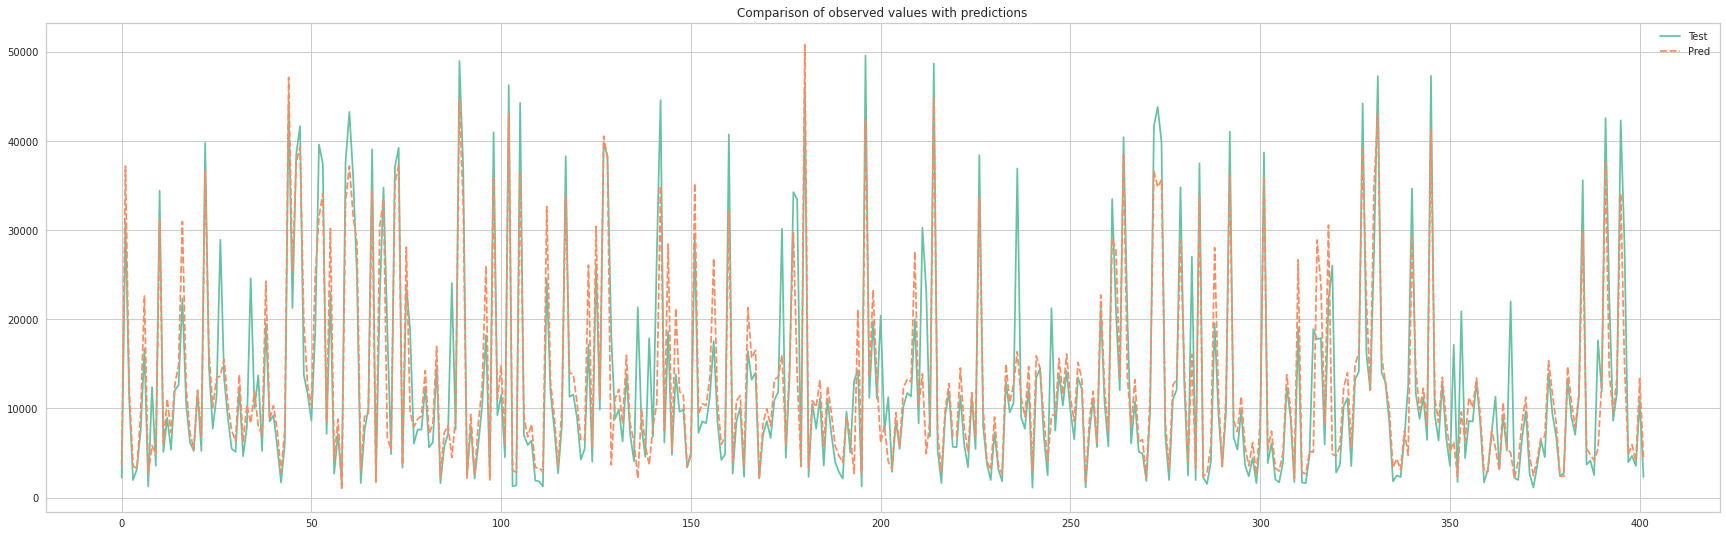

In [111]:
plt.figure(figsize = (30, 9))
plt.title('Comparison of observed values with predictions')
sns.lineplot(data=df_pred);

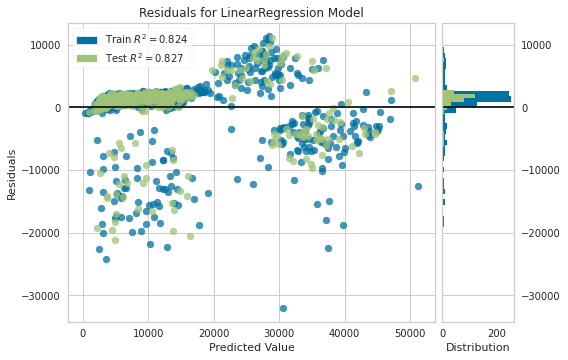

In [113]:
# Residuals Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_poly)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();              